 # Bigmart Sales Prediction By Analytic Vidya

In [221]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
# import ou trainand test csv
train=pd.read_csv(r'C:\Users\Shubhamay\Downloads\train_big_mart_sales_predicton.csv')
test=pd.read_csv(r'C:\Users\Shubhamay\Downloads\test_big_mart_sales_prediction.csv')
train .head(5)                

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [223]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [224]:
#replace the nullvalue present in the Item_Visibility with mean value of that column
#as it is the continious variable
train['Item_Visibility'].fillna(train['Item_Visibility'].mean(),inplace=True)

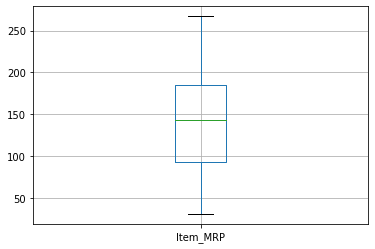

In [225]:
#from the diagram we can see that there is no outlier in Item_MRP
train.boxplot('Item_MRP')

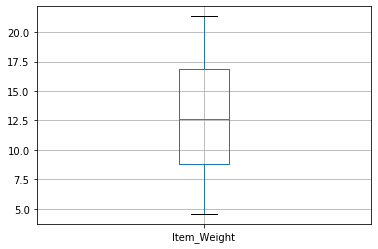

In [226]:
#from the diagram we can see that there is no outlier in Item_Weight
train.boxplot('Item_Weight')

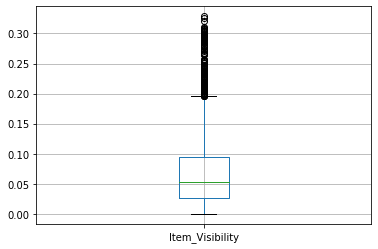

In [227]:
#from thebox plot we can see that theris some outlier in item visibity
train.boxplot('Item_Visibility')

In [228]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [229]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [230]:
#replace the nullvalue present in the item weight with mean value of that column
#as it is the continious variable
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [231]:
#place the null value present in the Outlet_Size with mode of that column
#as it is categorical variable
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

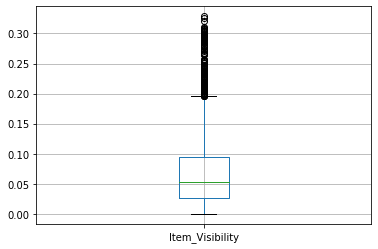

In [232]:
#now boxplot of the item_visibity after deal with the outliers present in thatvariable 
train.boxplot('Item_Visibility')

In [233]:
#to show is there an null value
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [234]:
train.shape

(8523, 12)

In [235]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDX20     9
FDG09     9
FDV60     9
         ..
FDQ60     1
FDE52     1
FDY43     1
FDO33     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [236]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [237]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [238]:
#to see how many individual value present in the outlet size
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [239]:
#to see how many individual row are in the train outlet location
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [240]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [241]:
train.shape

(8523, 12)

In [242]:
#to convert dummies of outlet type column
dummies_outlet_type=pd.get_dummies(train[['Outlet_Type']])

In [243]:
#to concate dummies table into the train datset
train=pd.concat([train,dummies_outlet_type],axis=1)
#drop outlet type column in the train dataset
train.drop('Outlet_Type',axis=1,inplace=True)
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,443.4228,0,0,1,0


In [244]:
#to convert dummies of outlet type location column
dummies_outlet_location_type=pd.get_dummies(train[['Outlet_Location_Type']])

In [245]:
#to concate dummies_outlat_location_type table in the train dataset
train=pd.concat([train,dummies_outlet_location_type],axis=1)
#to drop outlet location type column
train.drop('Outlet_Location_Type',axis=1,inplace=True)
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,3735.1380,0,1,0,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,443.4228,0,0,1,0,0,0,1


In [246]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [247]:
#to convert  outlet size convert by label encode 
train['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2},inplace=True)

In [248]:
train['Outlet_Size'].value_counts()

1    5203
0    2388
2     932
Name: Outlet_Size, dtype: int64

In [249]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,3735.1380,0,1,0,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,443.4228,0,0,1,0,0,0,1


In [250]:
train.shape

(8523, 17)

In [251]:
#to get dummies Item Type column
dummies_Item_Type=pd.get_dummies(train[['Item_Type']])
dummies_Item_Type.head(2)
dummies_Item_Type.shape

(8523, 16)

In [252]:
#to concate dummies Item Type to train dataset
train=pd.concat([train,dummies_Item_Type],axis=1)
#to drop Item Type column in the train dataset
train.drop('Item_Type',axis=1,inplace=True)
train.head(2)



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Grocery Store,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,1,443.4228,0,...,0,0,0,0,0,0,0,0,1,0


In [253]:
Item_fat_Contain_Stats=train.groupby('Item_Fat_Content')['Item_Fat_Content'].agg('count')

In [254]:
Item_fat_Contain_Stats

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

In [255]:
#to convert LF,low fat,reg in respectively in Low Fat and regular value
train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [256]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [257]:
train['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1},inplace=True)

In [258]:
train['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [259]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Grocery Store,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1999,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,1,0.019278,48.2692,OUT018,2009,1,443.4228,0,...,0,0,0,0,0,0,0,0,1,0


In [260]:
#to covert outlet_establishment_year  in the outlet age
train['Outlate_age']=2020-train['Outlet_Establishment_Year']

In [261]:
#`To drop establishment year  column from train dataset
train.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)


In [262]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlate_age
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1,3735.1380,0,1,...,0,0,0,0,0,0,0,0,0,21
1,DRC01,5.92,1,0.019278,48.2692,OUT018,1,443.4228,0,0,...,0,0,0,0,0,0,0,1,0,11


In [263]:

#replace the nullvalue present in the item weight with mean value of that column
#as it is the continious variable
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
#place the null value present in the Outlet_Size with mode of that column
#as it is categorical variable
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)
#to convert dummies of outlet type column
dummies_outlet_type=pd.get_dummies(test[['Outlet_Type']])
#to concate dummies table into the test datset
test=pd.concat([test,dummies_outlet_type],axis=1)
#drop outlet type column in the test dataset
test.drop('Outlet_Type',axis=1,inplace=True)
#to convert dummies of outlet type location column
dummies_outlet_location_type=pd.get_dummies(test[['Outlet_Location_Type']])
#to concate dummies_outlat_location_type table in the test dataset
test=pd.concat([test,dummies_outlet_location_type],axis=1)
#to drop outlet location type column
test.drop('Outlet_Location_Type',axis=1,inplace=True)
#to convert  outlet size convert by label encode 
test['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2},inplace=True)
#to get dummies Item Type column
dummies_Item_Type=pd.get_dummies(test[['Item_Type']])
#to concate dummies Item Type to test dataset
test=pd.concat([test,dummies_Item_Type],axis=1)
#to drop Item Type column in the test dataset
test.drop('Item_Type',axis=1,inplace=True)
#to convert LF,low fat,reg in respectively in Low Fat and regular value
test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
#to change string valu	e to numercal value by label encode
test['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1},inplace=True)
#to covert outlet_establishment_year  in the outlet age
test['Outlate_age']=2020-test['Outlet_Establishment_Year']
#`To drop establishment year  column from test dataset
test.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [264]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlate_age
0,FDW58,20.75,0,0.007565,107.8622,OUT049,1,0,1,0,...,0,0,0,0,0,0,1,0,0,21
1,FDW14,8.30,1,0.038428,87.3198,OUT017,1,0,1,0,...,0,0,0,0,0,0,0,0,0,13


In [265]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Item_Outlet_Sales',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlate_age'],
      dtype='object')

In [266]:
col=['Item_Weight','Item_Fat_Content', 'Item_Visibility',
       'Item_MRP',  'Outlet_Size','Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlate_age']

In [268]:
from sklearn.ensemble import RandomForestRegressor
X_train=train[list(col)].values
y_train=train['Item_Outlet_Sales'].values
X_test=test[list(col)].values

In [269]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [270]:
rf.score(X_train,y_train)

0.9376262893797178

In [271]:
train_prediction=rf.predict(X_train)

In [272]:
from sklearn import metrics
print('RMSE:',np.sqrt(metrics.mean_squared_error(train_prediction,y_train)))

RMSE: 426.1686571267211


In [273]:
test_prediction=dt.predict(X_test)

In [274]:
test['Item_Outlet_Sales']=test_prediction

In [275]:
test.to_csv('Big_mart_sale_predict.csv',columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],index=False)